# Visualize New York times database for COVID-19
## Case study Bristol and Suffolk, MA

# New Section

## Loading US County Level Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# https://github.com/nytimes/covid-19-data repository location
db = "https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv"
## loading data into dataframe


# Explore data

In [3]:
df = pd.read_csv(db)
df.head(5)

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0.0
1,2020-01-22,Snohomish,Washington,53061.0,1,0.0
2,2020-01-23,Snohomish,Washington,53061.0,1,0.0
3,2020-01-24,Cook,Illinois,17031.0,1,0.0
4,2020-01-24,Snohomish,Washington,53061.0,1,0.0


In [6]:
# let us get fips for 2 counties  (Bristol and Suffolk, MA)
## fips stands for : Federal Information Processing Standards
Bristol_fips = df.loc[df['county'] == 'Bristol',['fips']]
Suffolk_fips = df.loc[df['county'] == 'Suffolk',['fips']]

print("Bristol fips\n", Bristol_fips)
print("Suffolk fips\n", Suffolk_fips)
#- ADD CODE HERE (2)

Bristol fips
            fips
2093    25005.0
2494    25005.0
2943    25005.0
3444    25005.0
4026    25005.0
...         ...
776881  44001.0
778948  25005.0
780128  44001.0
782195  25005.0
783374  44001.0

[513 rows x 1 columns]
Suffolk fips
            fips
44      25025.0
52      25025.0
60      25025.0
68      25025.0
76      25025.0
...         ...
776366  36103.0
778958  25025.0
779612  36103.0
782205  25025.0
782859  36103.0

[572 rows x 1 columns]


In [10]:
#ADD CODE HERE - (3)
def get_county_stat(dataframe, county_fips):
    stats = dict()
    stats['date'] = dataframe.loc[dataframe['fips'] == county_fips, ['date']]
    stats['cases'] = dataframe.loc[dataframe['fips'] == county_fips, ['cases']]
    stats['deaths'] = dataframe.loc[dataframe['fips'] == county_fips, ['deaths']]
    return stats

In [24]:
# this specific statement causes the kernel to run an infinite loop
get_county_stat(df,Bristol_fips).head()
# tried this too, but did not work 
get_county_stat(df,Bristol_fips)

KeyboardInterrupt: 

## Explore data type

In [16]:
df_Bristol = get_county_stat(df,25005)
df_Suffolk = get_county_stat(df,25025)

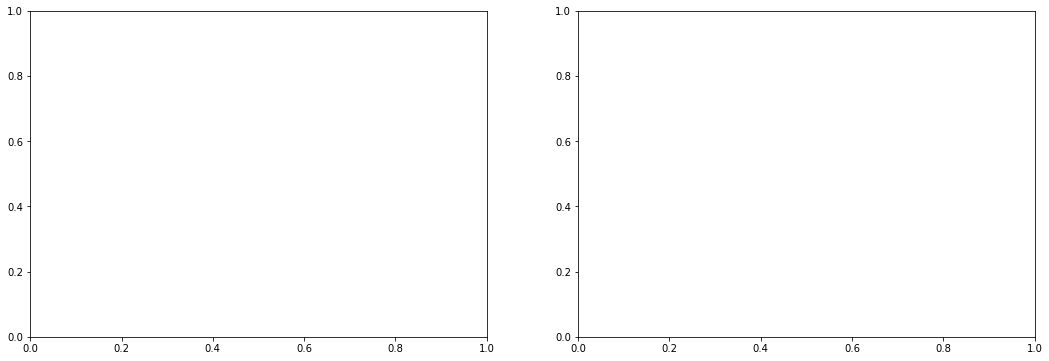

In [23]:
f,ax = plt.subplots(1,2,figsize=(18,6))
#ADD CODE HERE - (4)


In [28]:
bristol_cases= df[(df['state'].str.startswith('Mass')) & (df['county']=='Bristol')].copy()
bristol_cases['date'] = pd.to_datetime(bristol_cases['date'])


suffolk_cases= df[(df['state'].str.startswith('Mass')) & (df['county']=='Suffolk')].copy()
suffolk_cases['date'] = pd.to_datetime(suffolk_cases['date'])

<BarContainer object of 90 artists>

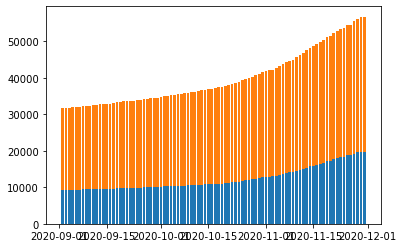

In [29]:
f,ax = plt.subplots(1,1)
ax.bar(bristol_cases.date.iloc[-90:],bristol_cases.cases.iloc[-90:])
ax.bar(suffolk_cases.date.iloc[-90:],suffolk_cases.cases.iloc[-90:],
       bottom = bristol_cases.cases.iloc[-90:]  )


## Top 10 counties by number of cases and deaths 



```
# This is formatted as code
```





In [18]:
df.head(1)

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0.0


In [19]:
grp = df.groupby('fips')#['date'].last().unique()#.last()#.sort_values(by='cases',ascending=False ).head(10)

In [20]:
lst[-1]

NameError: name 'lst' is not defined

In [21]:
df['date']=pd.to_datetime(df['date'])
top10 = df[df['date'] == '2020-09-13'].sort_values(by='cases',ascending=False).head(10).copy()
top10


,date,county,state,fips,cases,deaths
528209,2020-09-13,Los Angeles,California,6037.0,253985,6208.0
529872,2020-09-13,New York City,New York,NaN,242486,23743.0
528368,2020-09-13,Miami-Dade,Florida,12086.0,164085,2880.0
528107,2020-09-13,Maricopa,Arizona,4013.0,137507,3154.0
528618,2020-09-13,Cook,Illinois,17031.0,134801,5133.0
530719,2020-09-13,Harris,Texas,48201.0,116172,2420.0
530675,2020-09-13,Dallas,Texas,48113.0,78511,1045.0
528331,2020-09-13,Broward,Florida,12011.0,74434,1280.0
529763,2020-09-13,Clark,Nevada,32003.0,62650,1260.0
528223,2020-09-13,Riverside,California,6065.0,55073,1103.0


## Death rate Per FIPS 

## <font color = red> Bonus Point</font>

### A function that makes "Folium Choropleth Map" for Weekly Cases, Weekly Deaths and Weekly Mortality Rate </font>

ALL COUNTIES

<br>

### def Folium_Choropleth(type = 'cases',date=''):

<br>

## Due for Bonus point : Wednesday (09/16/2020 12:00pm)